# **Correlation analysis in realworld data**

In [1]:
install.packages("mlbench")
install.packages("ggpubr")
install.packages("EnvStats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’




In [13]:
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(mlbench)
library(tidyverse)
library(ggpubr)
library(EnvStats)

In [14]:
library(nortest)

In [4]:
download.file("https://drive.usercontent.google.com/uc?id=1bjCasHUr6BzSi3ZqAsDuKjvVo0y9N95J&authuser=0&export=download",
              tf <- tempfile())
ulab<-readRDS(tf)

In [ ]:
glimpse(ulab)

Rows: 8,608
Columns: 3
$ id  <dbl> 83732, 83733, 83734, 83735, 83736, 83737, 83738, 83739, 83741, 837…
$ alb <dbl> 2.5, 23.2, 105.0, 5.8, 47.6, 10.4, 7.4, 2.0, 3.9, 5.7, 2.0, 222.0,…
$ cr  <dbl> 41, 181, 70, 102, 315, 64, 100, 25, 75, 107, 58, 204, 178, 34, 148…


**Data dictionary**

| Variable | Describtion      | Unit   |
|----------|------------------|--------|
| alb      | Urine albumin    | ug/mL  |
| cr       | Urine creatinine | mg/dL  |

For futher details, see: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALB_CR_I.htm#Component_Description

**Set hypothesis**

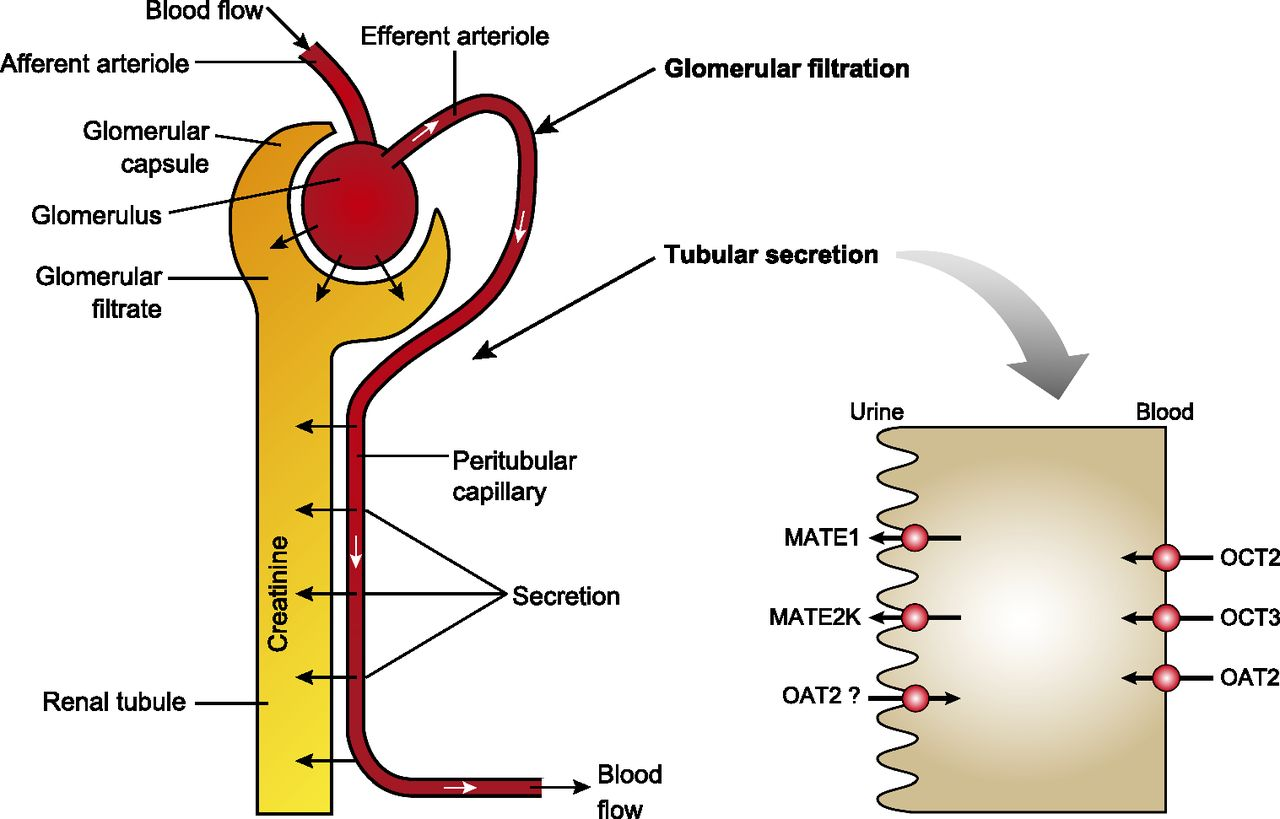

X: Urine creatinine, Y: Urine albumin

**Check class of variables**

In [8]:
class(ulab$cr); class(ulab$alb)

[1] "numeric"

[1] "numeric"

**Visualization**

Warning message:
“Removed 328 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values (`geom_point()`).”


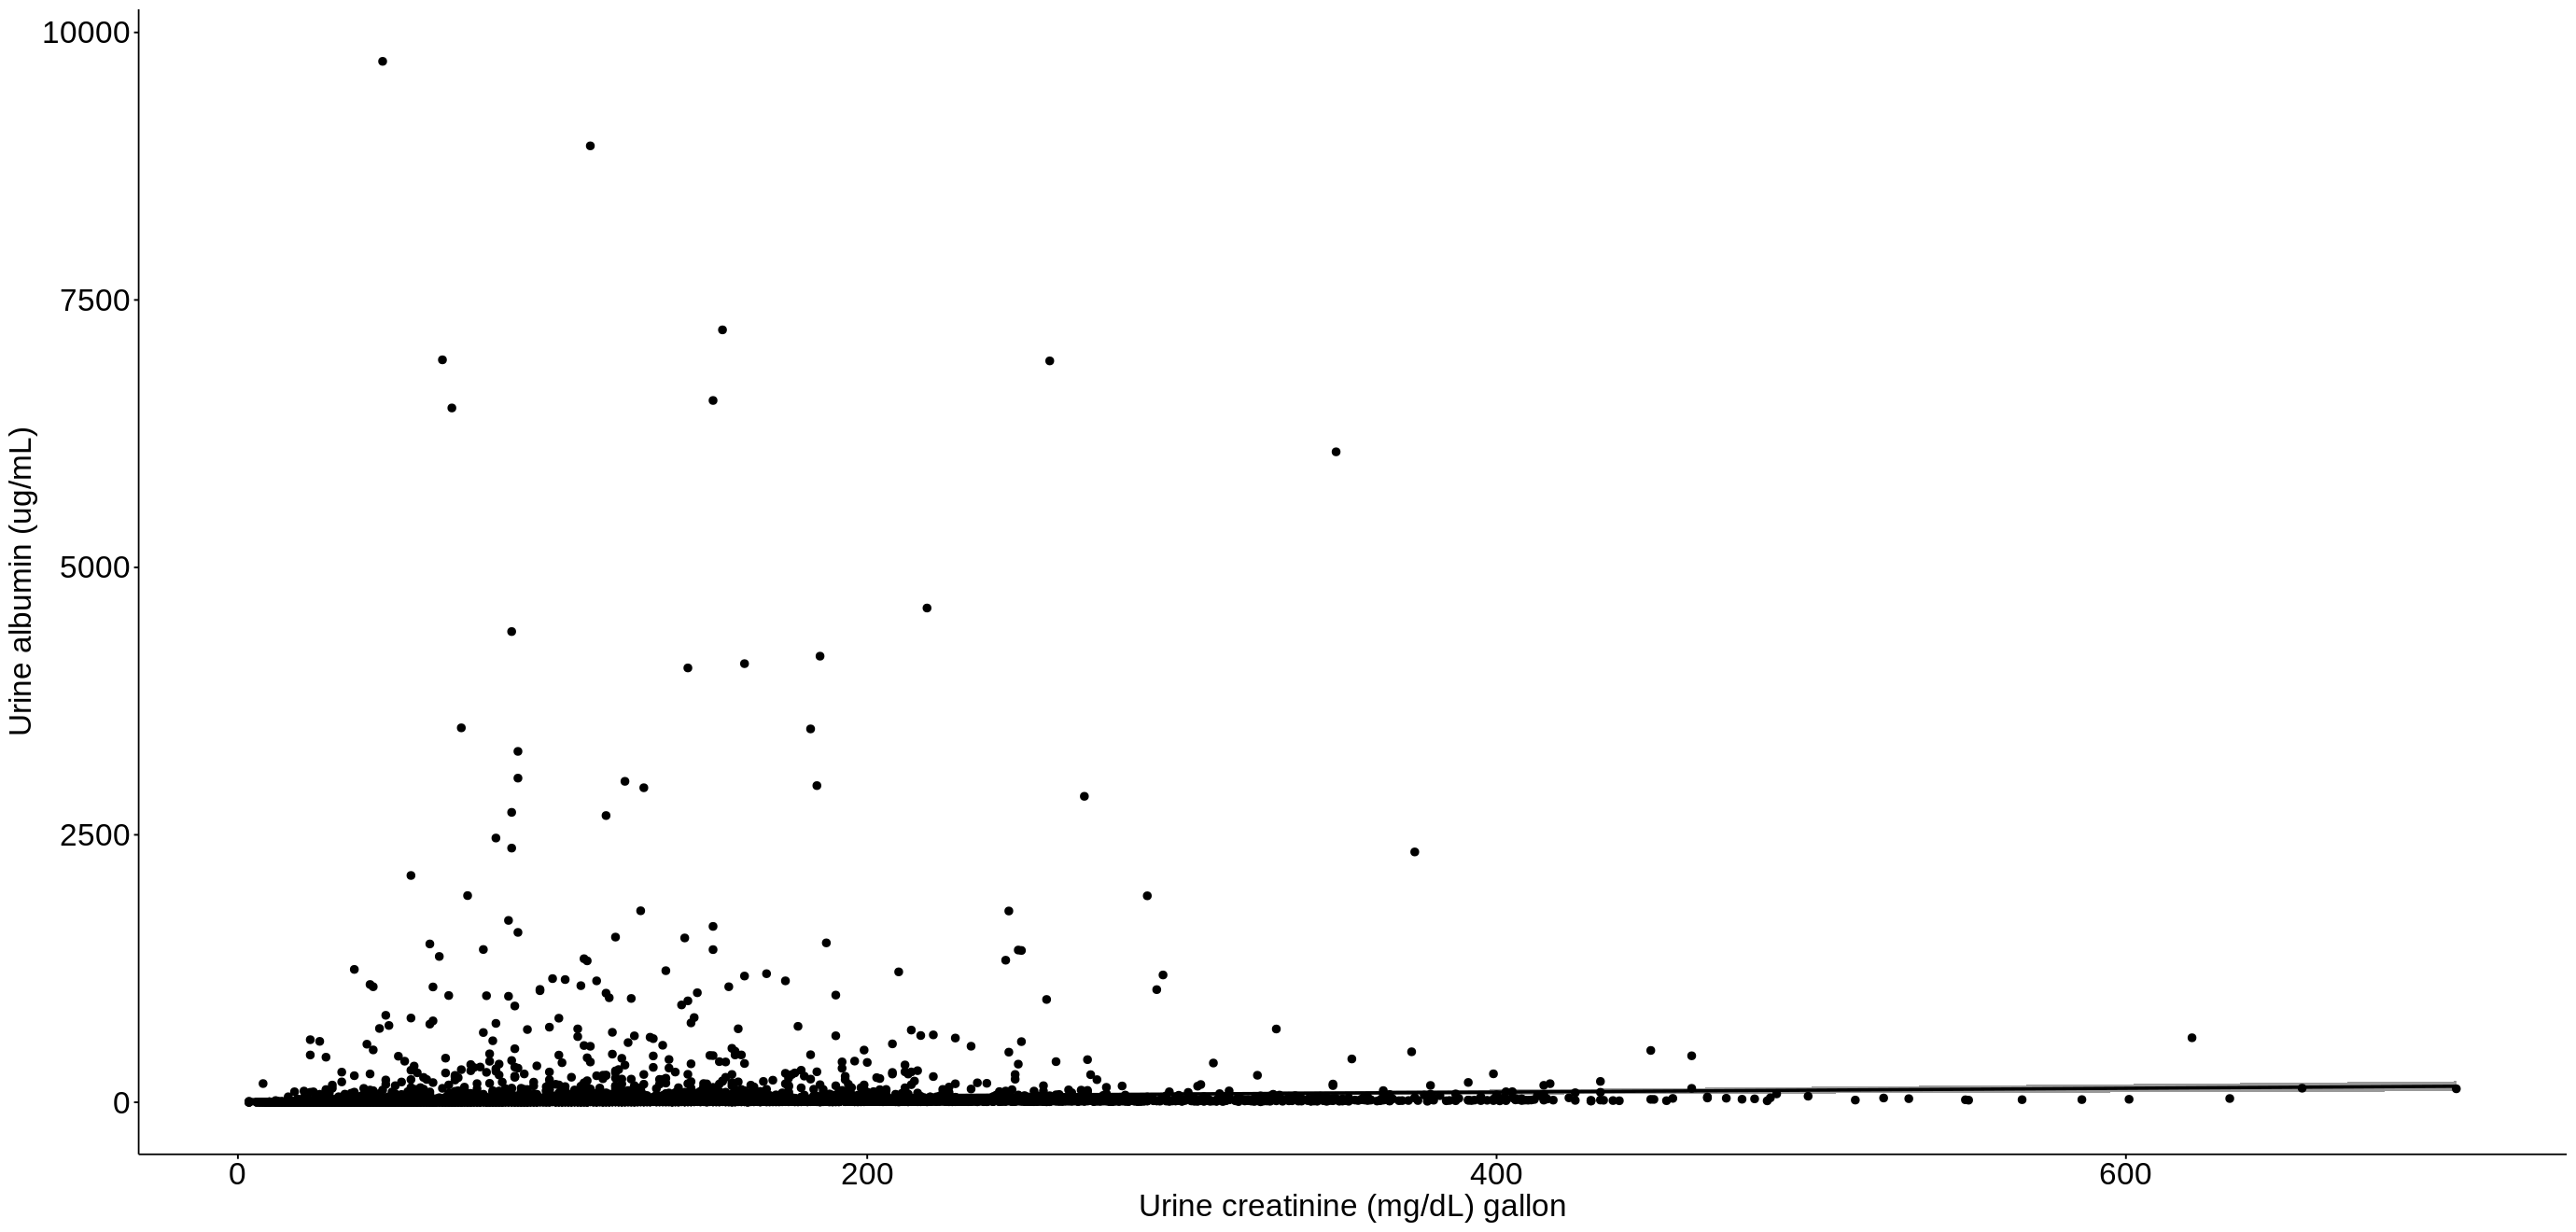

In [10]:
options(repr.plot.width=23, repr.plot.height=11)
ggscatter(ulab, x = "cr", y = "alb",
          add = "reg.line", conf.int = TRUE,
          xlab = "Urine creatinine (mg/dL) gallon", ylab = "Urine albumin (ug/mL)")+
            theme(text = element_text(size = 20))

It doesn't have linear trend. Roughly, r is around zero. (nearly horizontal)

**Check normality assumtion**

In [11]:
shapiro.test(ulab$cr)

ERROR: ignored

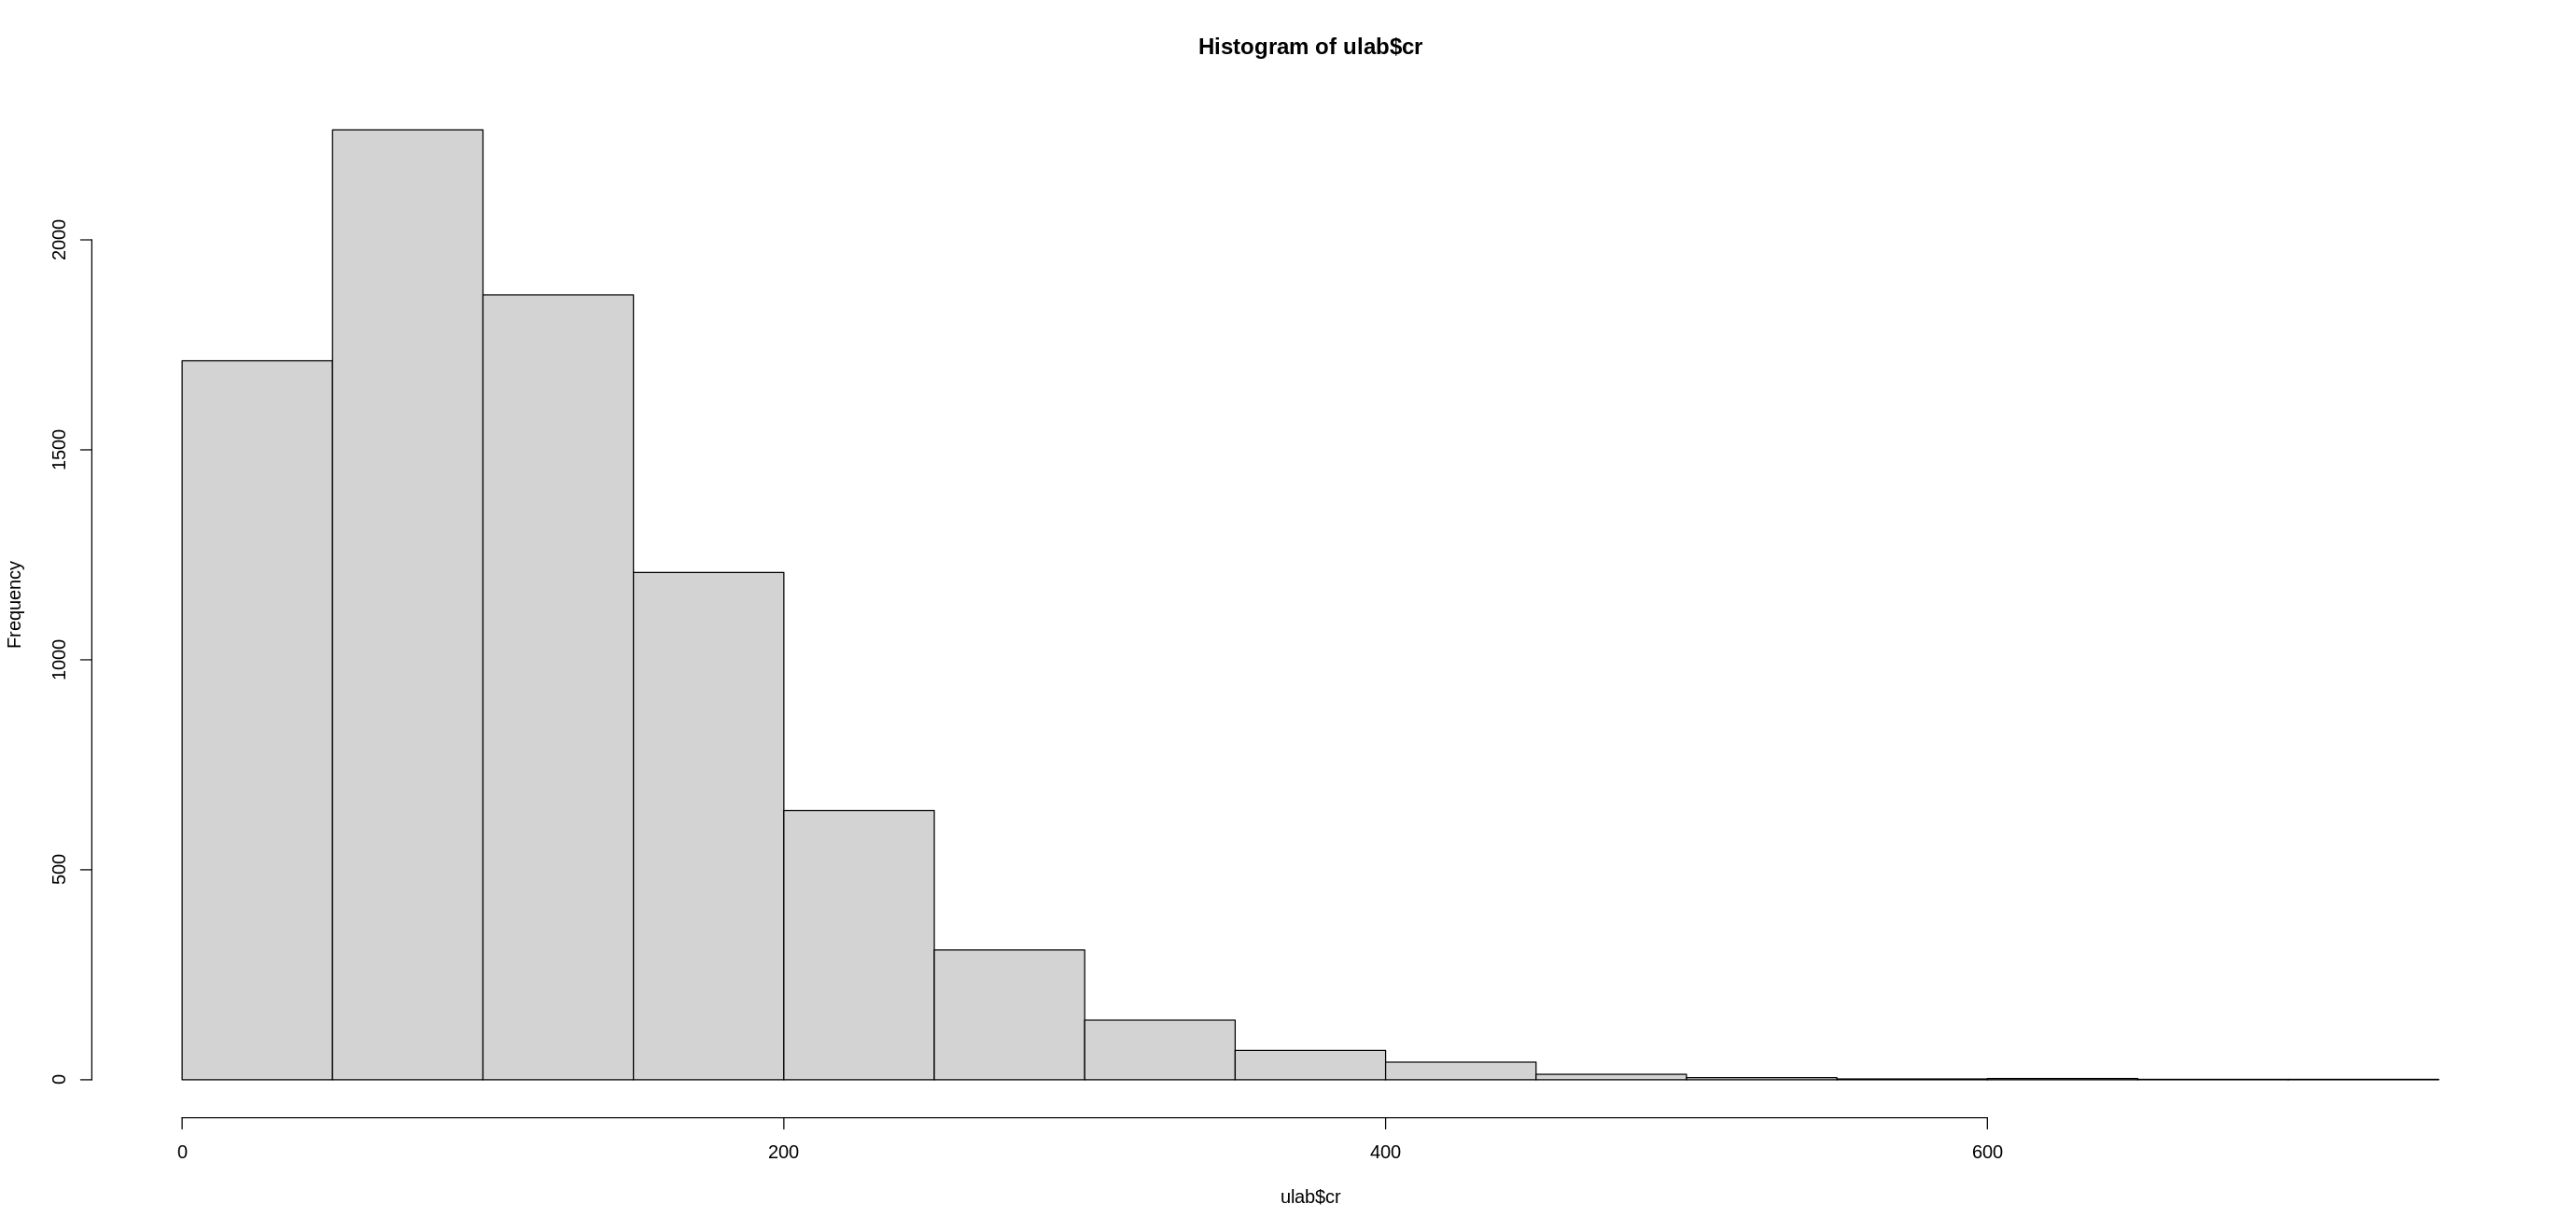

In [15]:
hist(ulab$cr)

In [16]:
ad.test(ulab$cr)


	Anderson-Darling normality test

data:  ulab$cr
A = 158.61, p-value < 2.2e-16


P value < 0.05, **Thus urine creatinine is not normally distributed.**

In [17]:
shapiro.test(ulab$alb)

ERROR: ignored

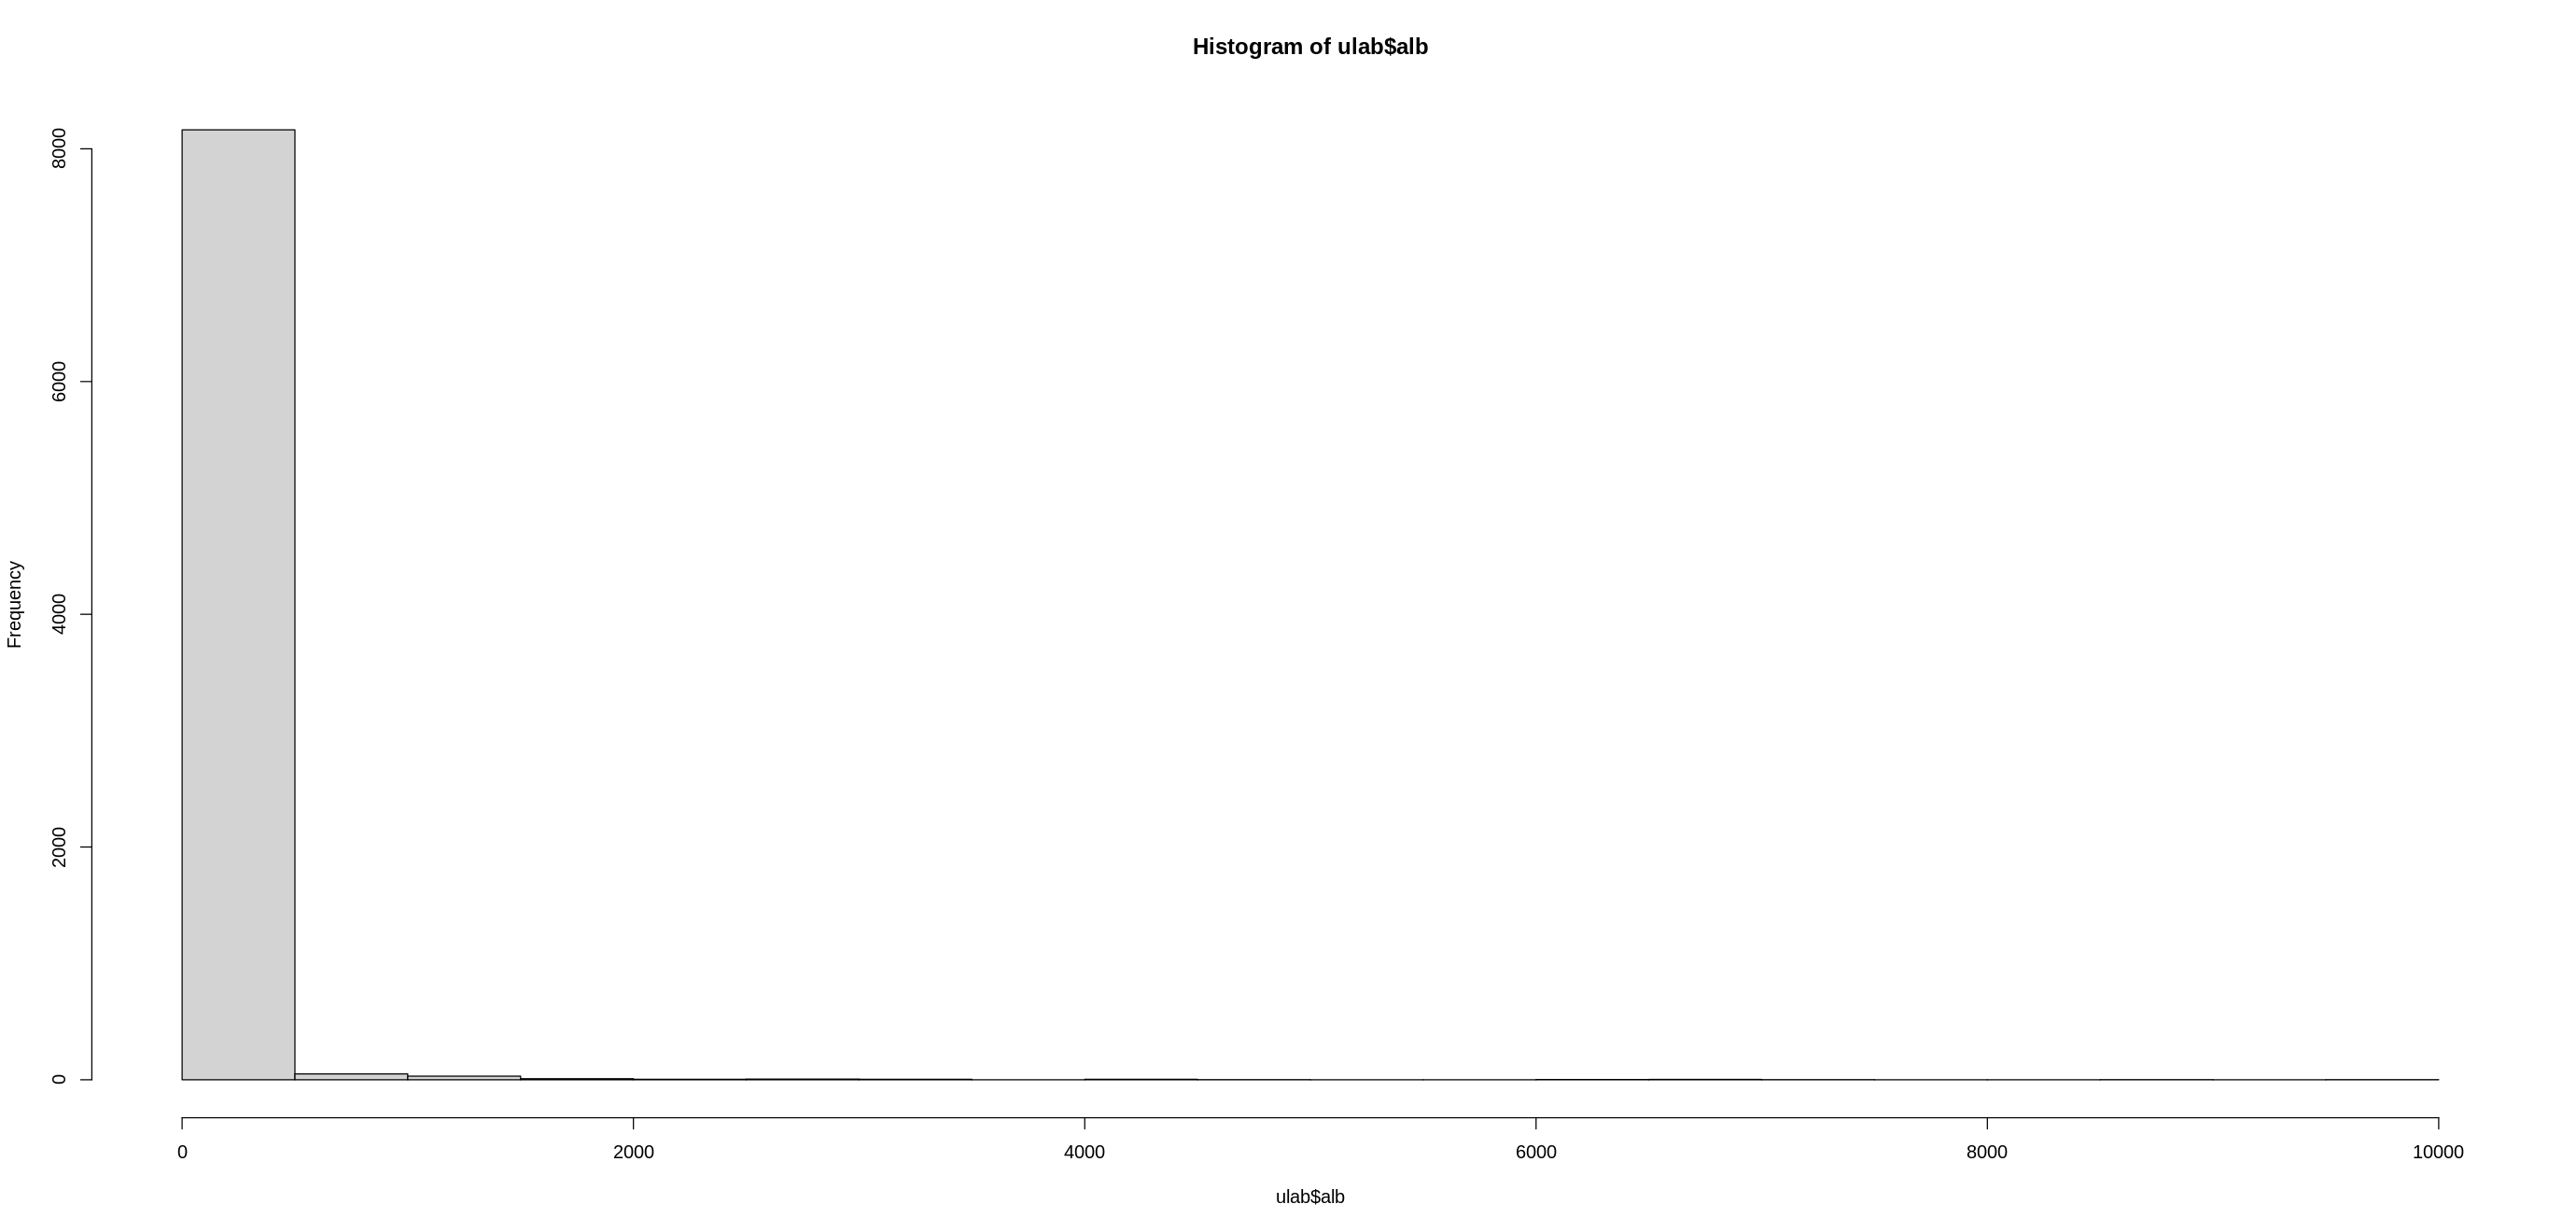

In [18]:
hist(ulab$alb)

In [19]:
ad.test(ulab$alb)


	Anderson-Darling normality test

data:  ulab$alb
A = 2612.1, p-value < 2.2e-16


**Check for the outlier**

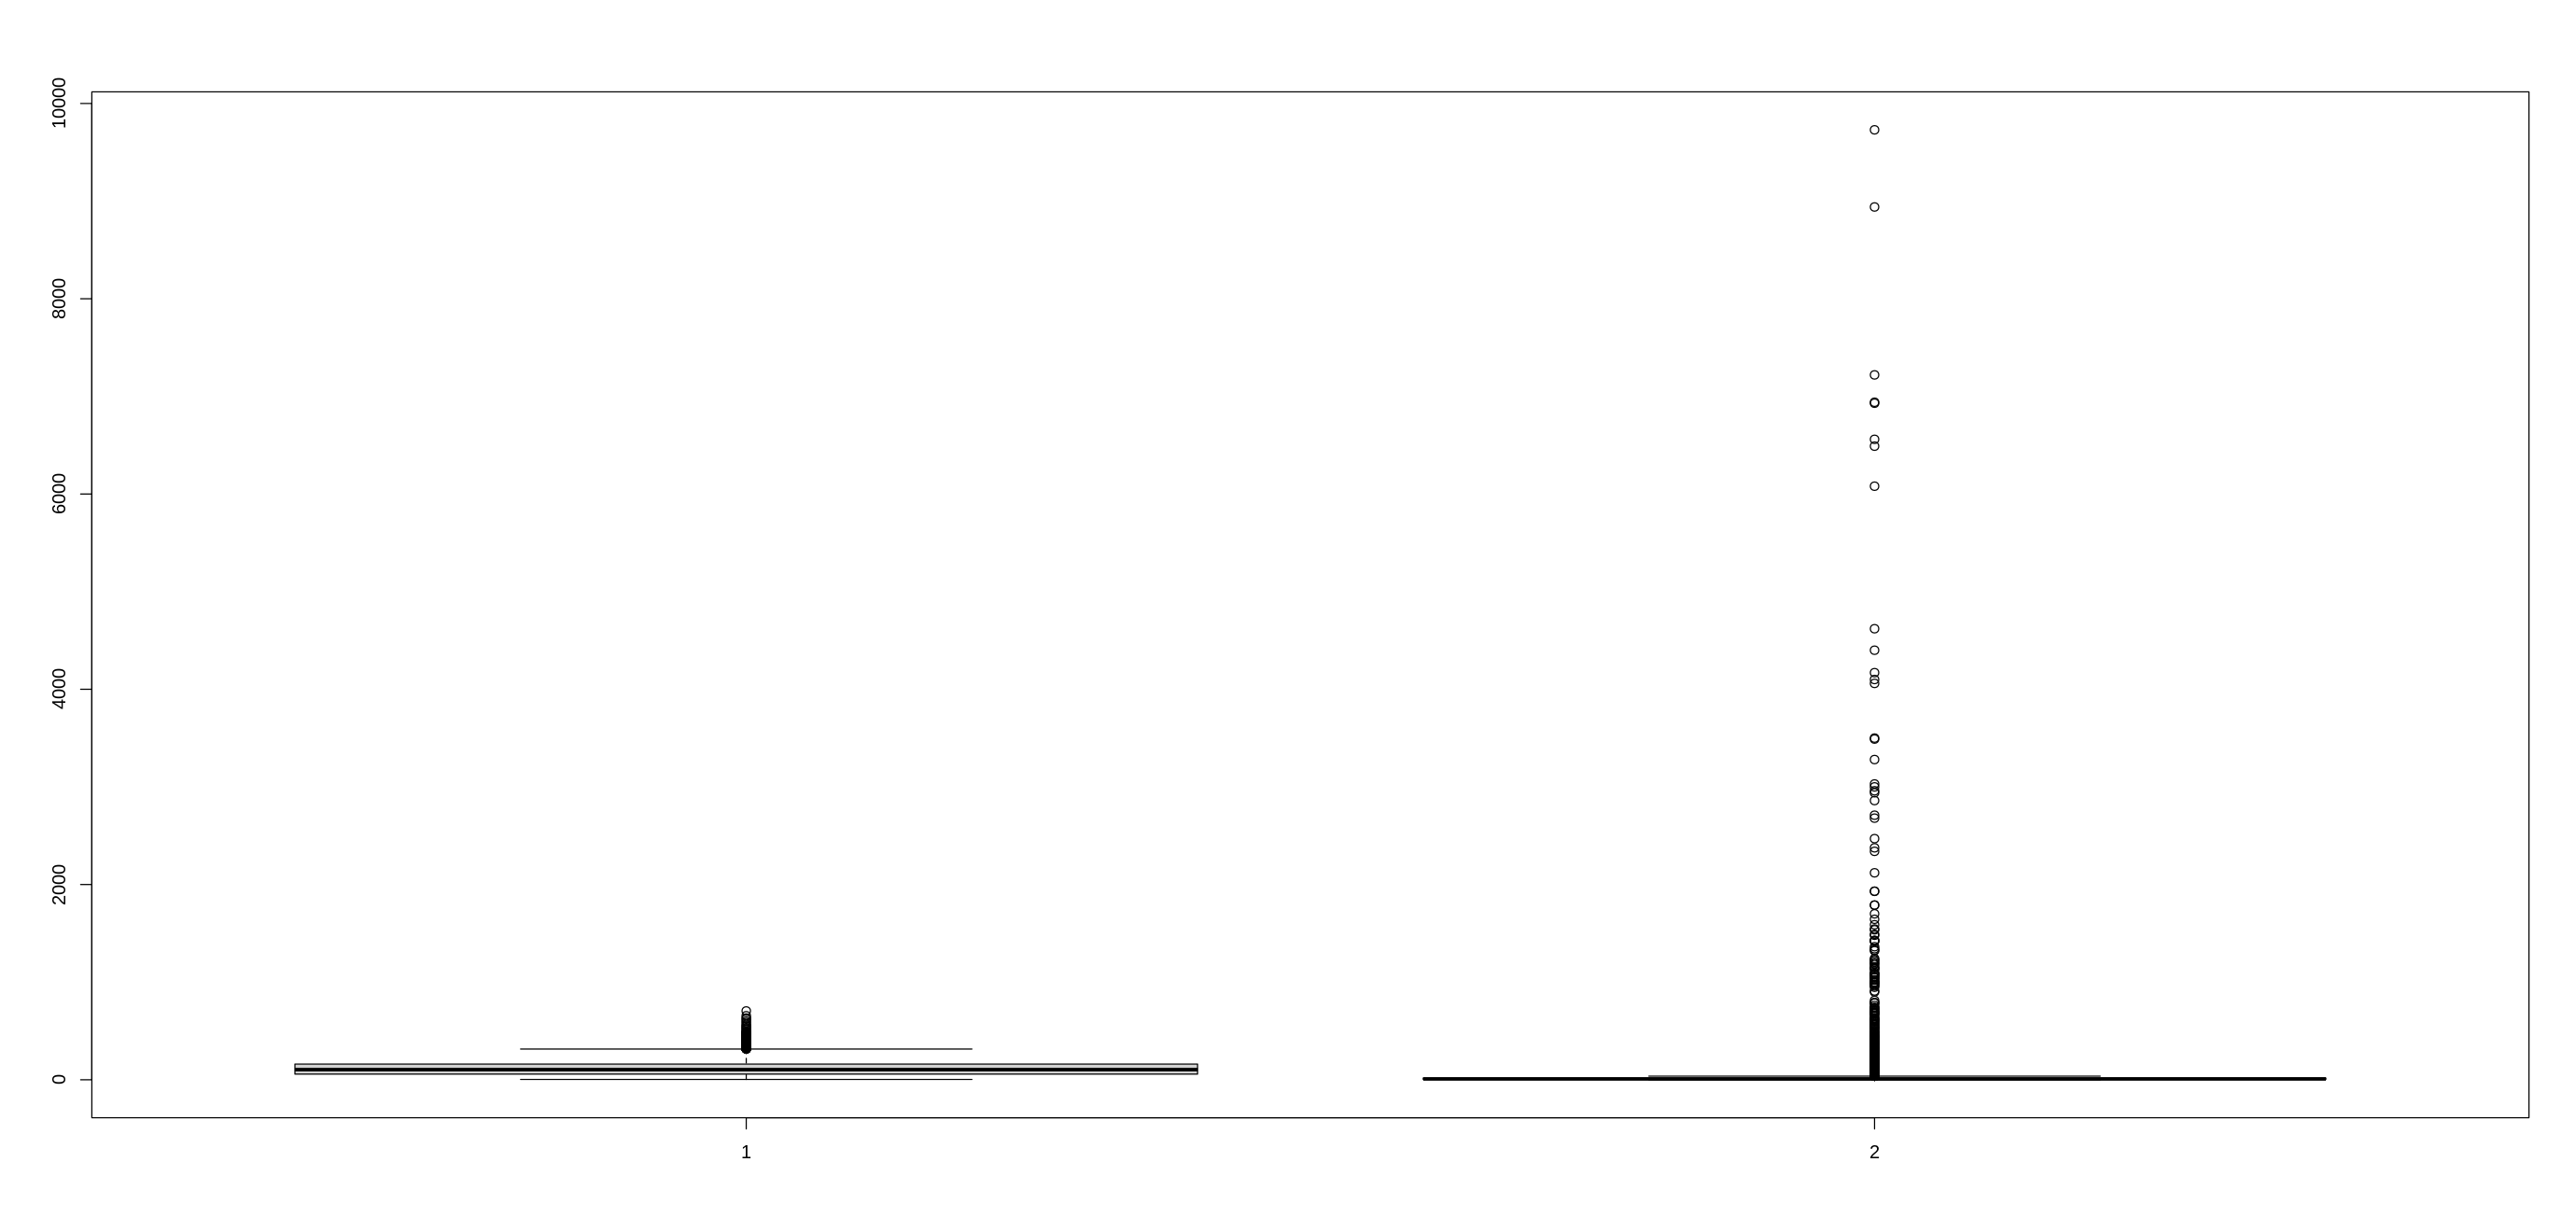

In [20]:
boxplot(ulab$cr,ulab$alb)

In [22]:
rosnerTest(ulab$cr,k=10)

Warning message in rosnerTest(ulab$cr, k = 10):
“328 observations with NA/NaN/Inf in 'x' removed.”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab$cr

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 7.167394
                                 R.2  = 6.588005
                                 R.3  = 6.322369
                                 R.4  = 6.189877
                                 R.5  = 5.957076
                                 R.6  = 5.784198
                                 R.7  = 5.560147
                                 R.8  = 5.359243
                                 R.9  = 5.356425
                                 R.10 = 5.141201

Test Statistic Parameter:        k = 10

Alternative Hypothesis:          Up to 10 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     

In [23]:
rosnerTest(ulab$cr,k=15)

Warning message in rosnerTest(ulab$cr, k = 15):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab$cr, k = 15):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab$cr

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 7.167394
                                 R.2  = 6.588005
                                 R.3  = 6.322369
                                 R.4  = 6.189877
                                 R.5  = 5.957076
                                 R.6  = 5.784198
                                 R.7  = 5.560147
                                 R.8  = 5.359243
                                 R.9  = 5.356425
                                 R.10 = 5.141201
                                 R.11 = 5.049656
                                 R.12 = 4.944994
                                 R.13 = 4.764401
                                 R.14 = 4.645599
                                 R.15 = 4

In [24]:
rosnerTest(ulab$cr,k=20)

Warning message in rosnerTest(ulab$cr, k = 20):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab$cr, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab$cr

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 7.167394
                                 R.2  = 6.588005
                                 R.3  = 6.322369
                                 R.4  = 6.189877
                                 R.5  = 5.957076
                                 R.6  = 5.784198
                                 R.7  = 5.560147
                                 R.8  = 5.359243
                                 R.9  = 5.356425
                                 R.10 = 5.141201
                                 R.11 = 5.049656
                                 R.12 = 4.944994
                                 R.13 = 4.764401
                                 R.14 = 4.645599
                                 R.15 = 4

In [25]:
rosnerTest(ulab$alb,k=30)

Warning message in rosnerTest(ulab$alb, k = 30):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab$alb, k = 30):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab$alb

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 32.12260
                                 R.2  = 31.53522
                                 R.3  = 27.12162
                                 R.4  = 27.30697
                                 R.5  = 28.58746
                                 R.6  = 28.49777
                                 R.7  = 29.68834
                                 R.8  = 29.41436
                                 R.9  = 23.57473
                                 R.10 = 23.23867
                                 R.11 = 22.77102
                                 R.12 = 23.12356
                                 R.13 = 23.67580
                                 R.14 = 21.11078
                                 R.15 = 

If you found > 10 outliers and you see no linear trend, **consider log scale transformation** before using Spearman or Kandall Rank correlation methods.

**Transform data**

x = log(cr), y = log(alb)

In [26]:
ulab2<-data.frame(cr=log(ulab$cr),alb=log(ulab$alb))

Warning message:
“Removed 328 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values (`geom_point()`).”


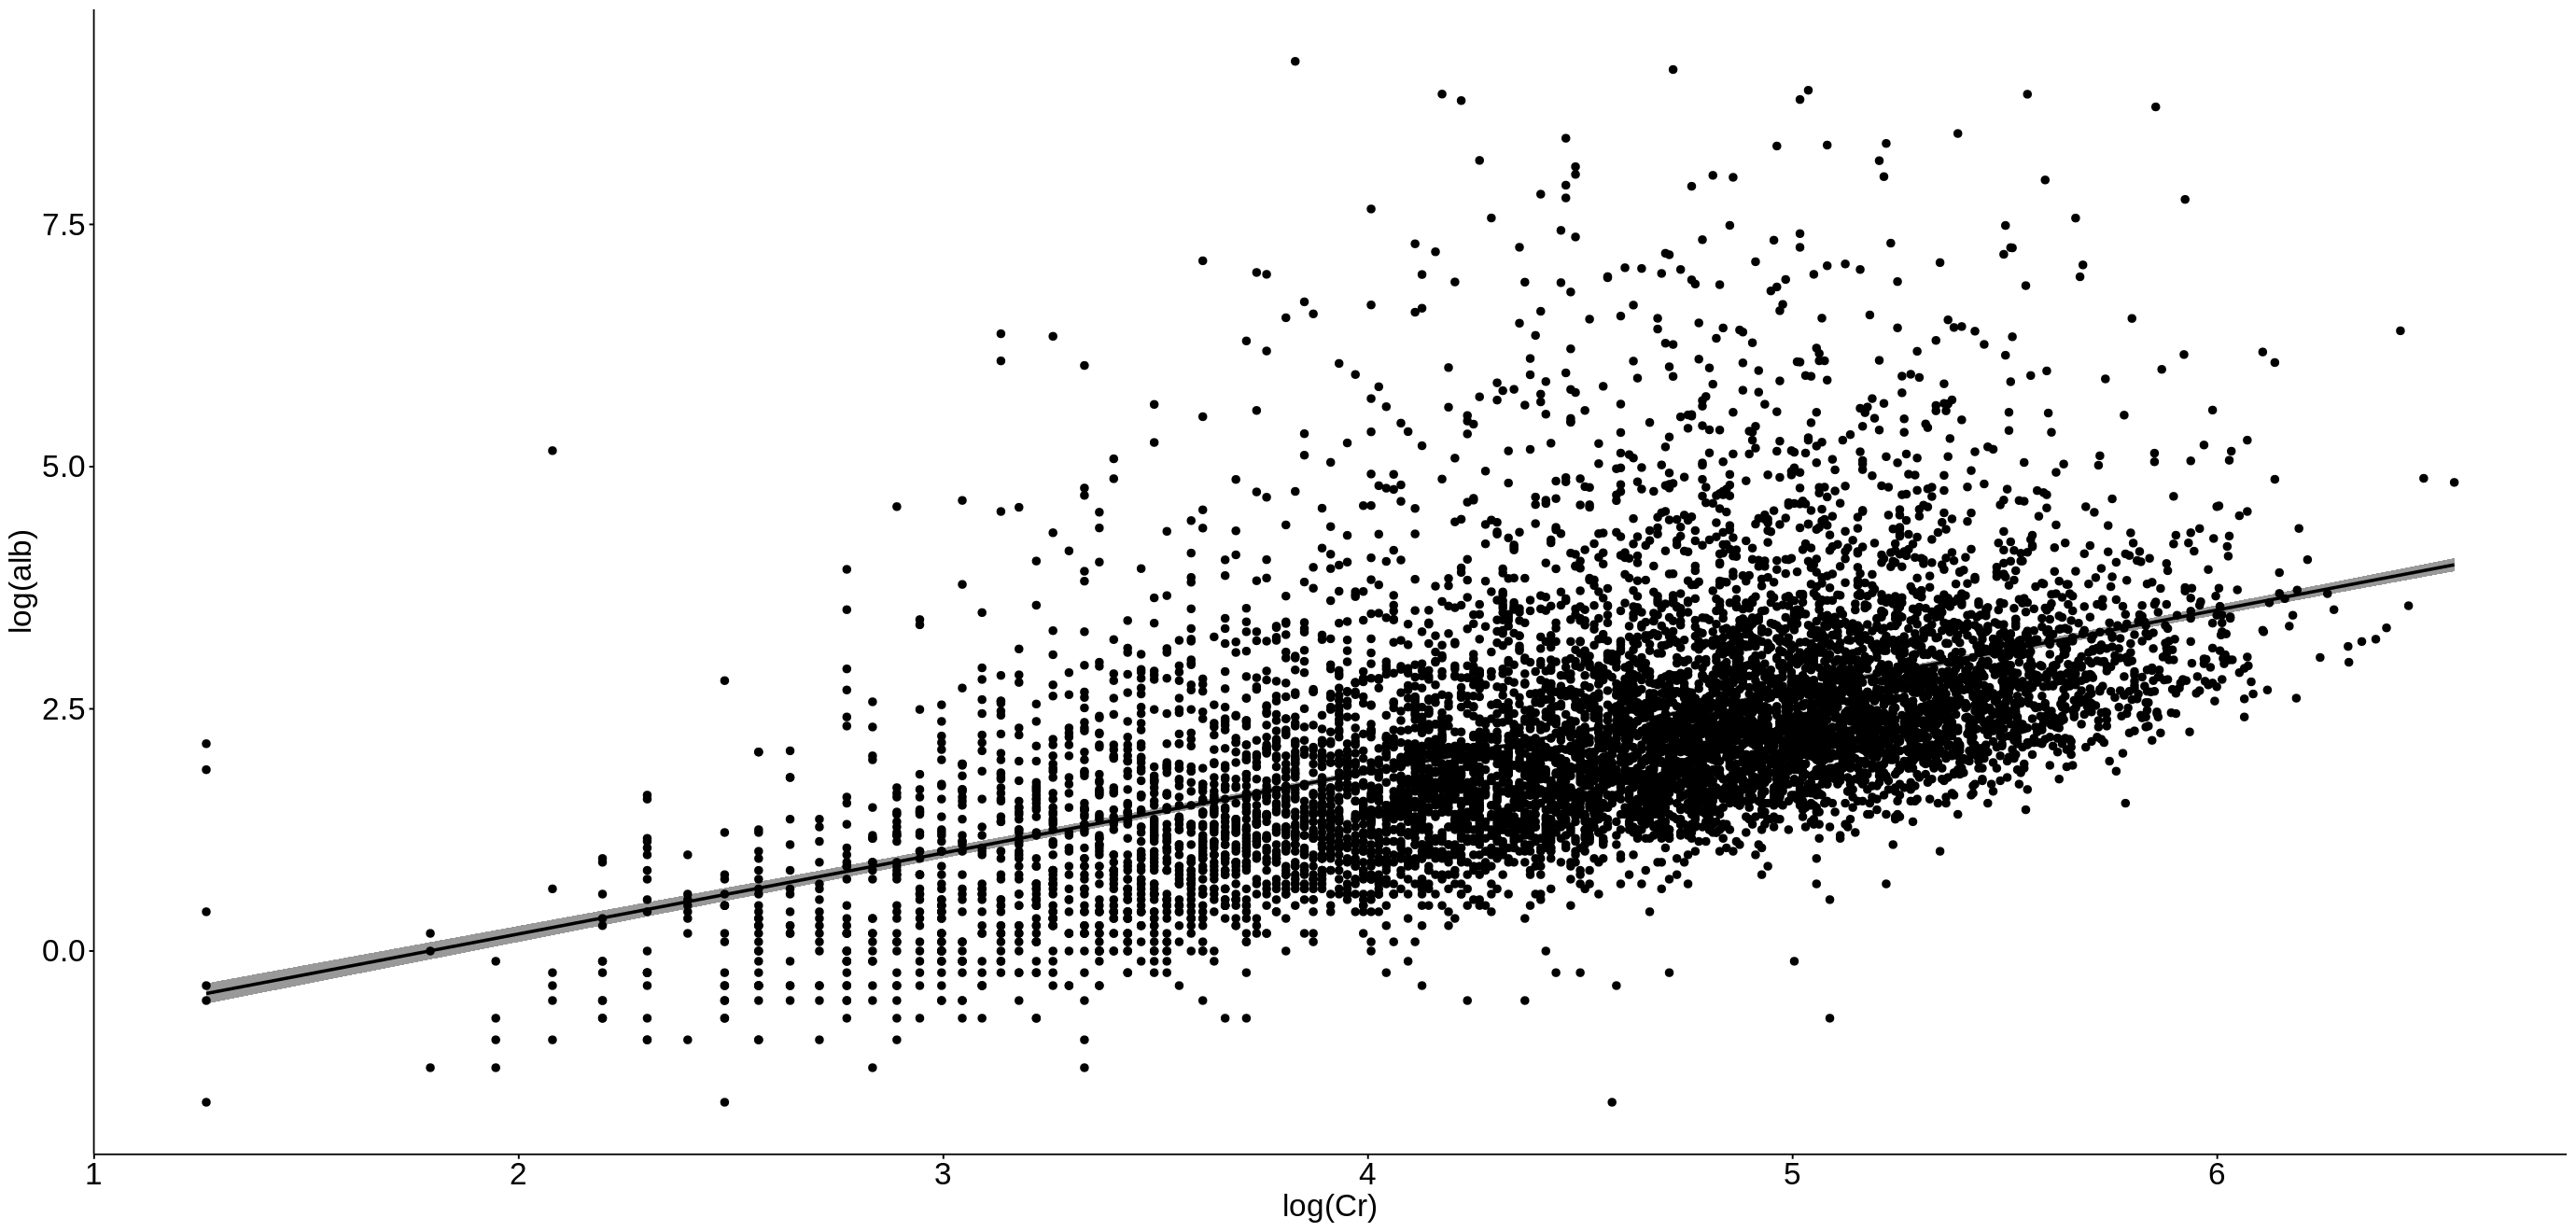

In [27]:
ggscatter(ulab2, x = "cr", y = "alb",
          add = "reg.line", conf.int = TRUE,
          xlab = "log(Cr)", ylab = "log(alb)")+
            theme(text = element_text(size = 20))

Now you can see an upward linear trend.

**Check for normality**

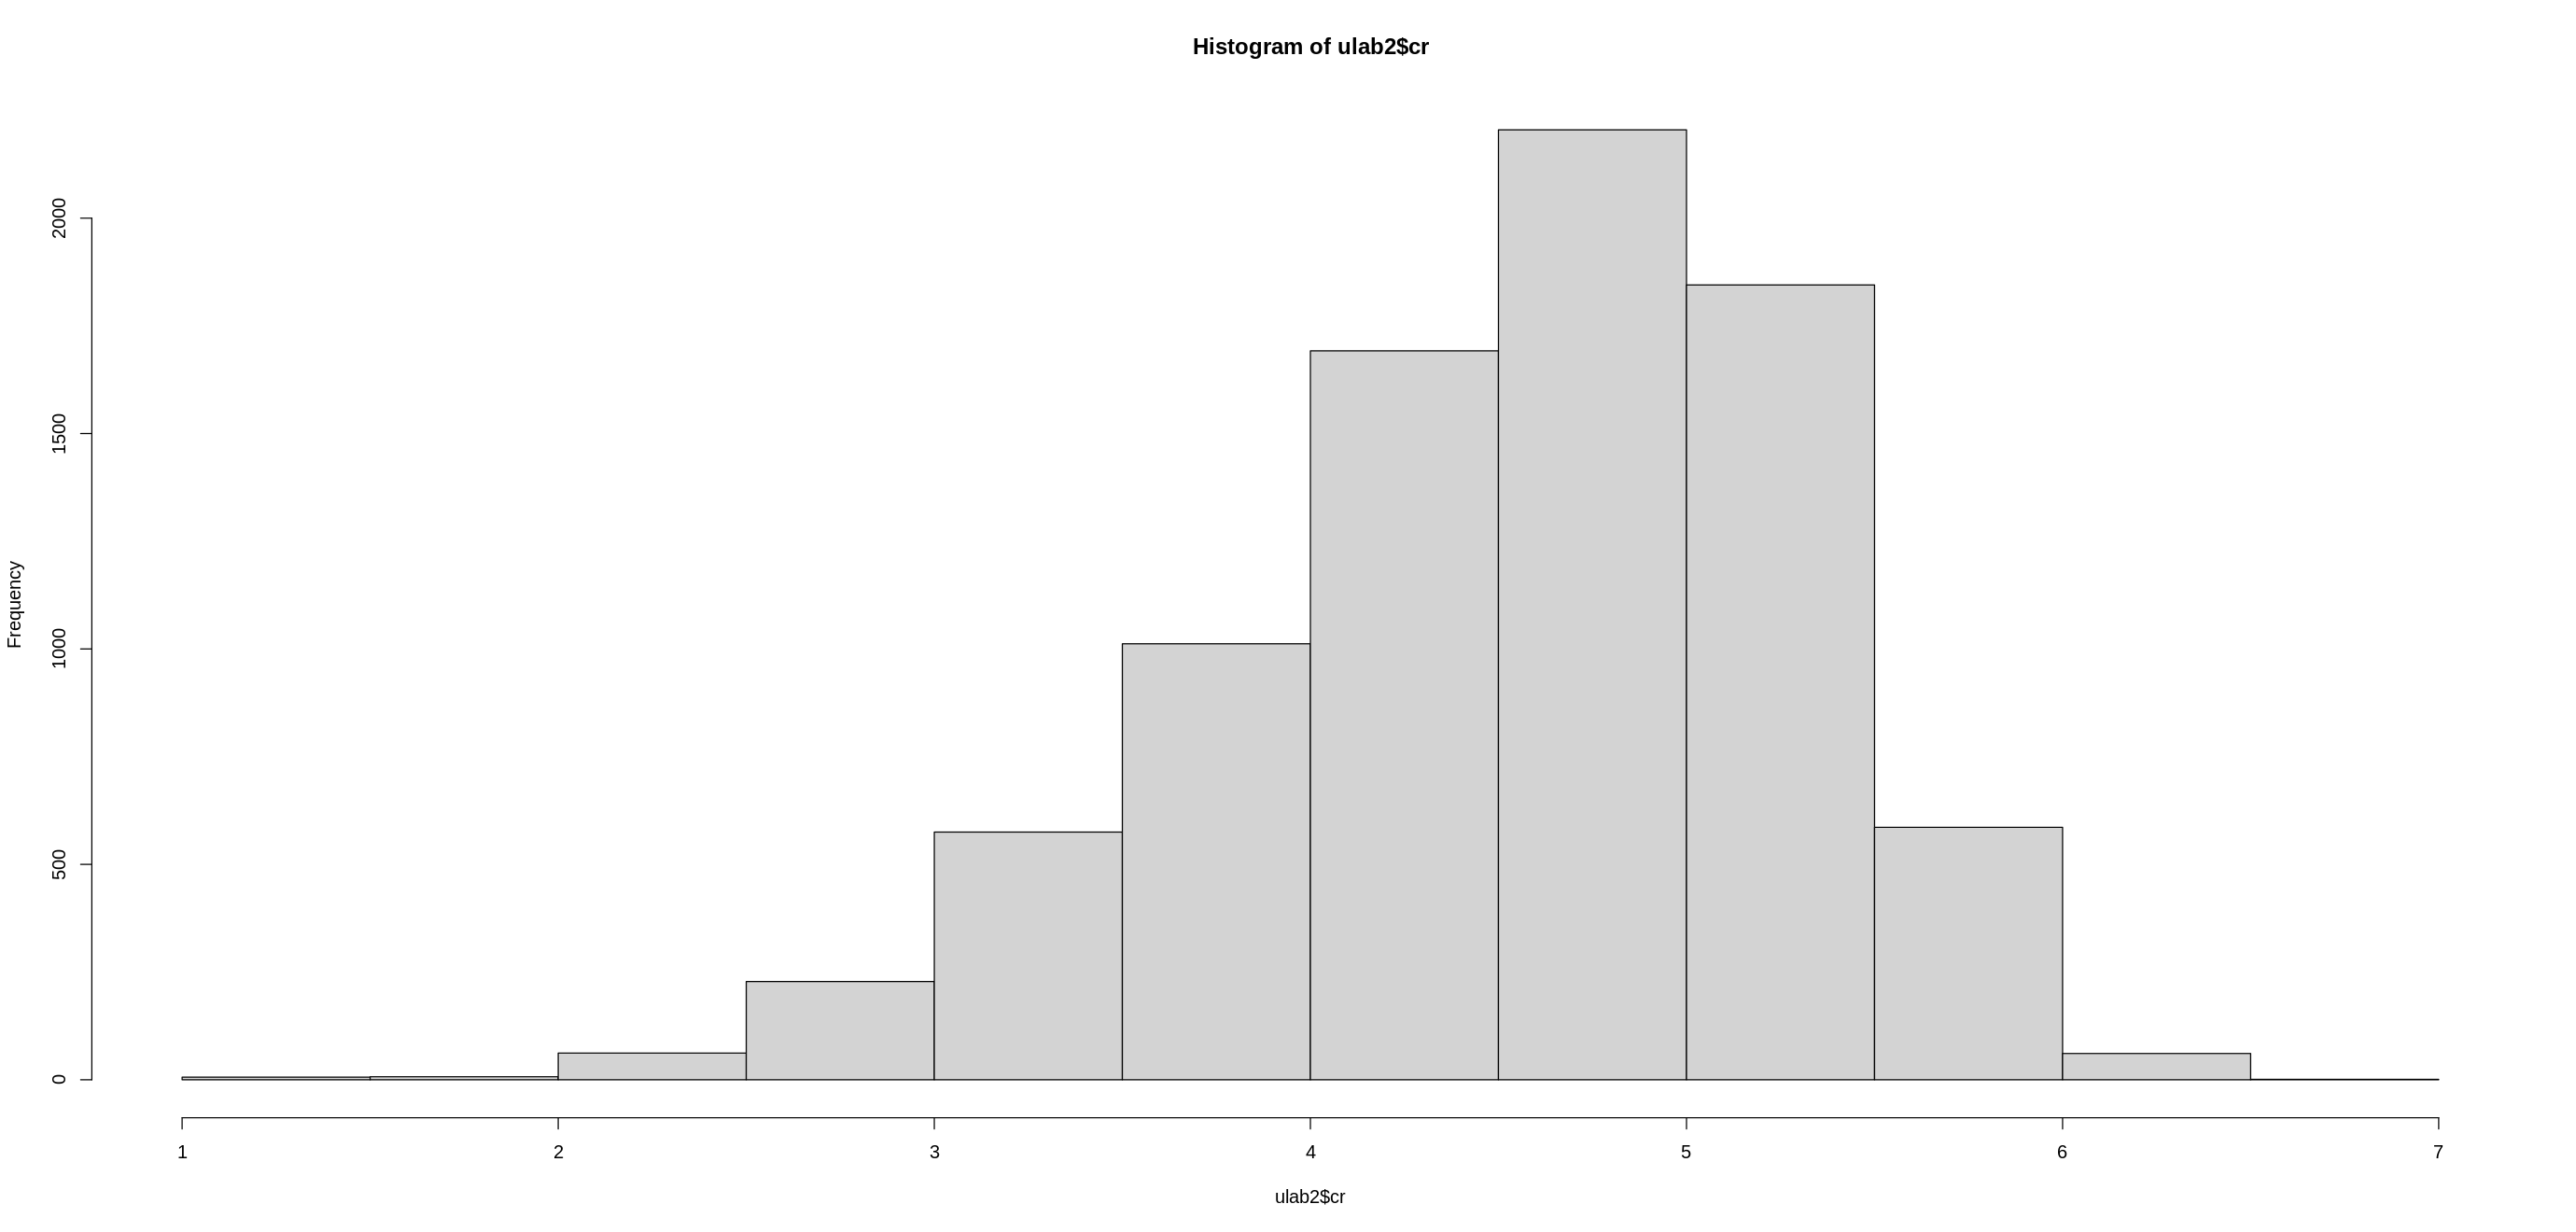

In [28]:
hist(ulab2$cr)

In [29]:
ad.test(ulab2$cr)


	Anderson-Darling normality test

data:  ulab2$cr
A = 48.515, p-value < 2.2e-16


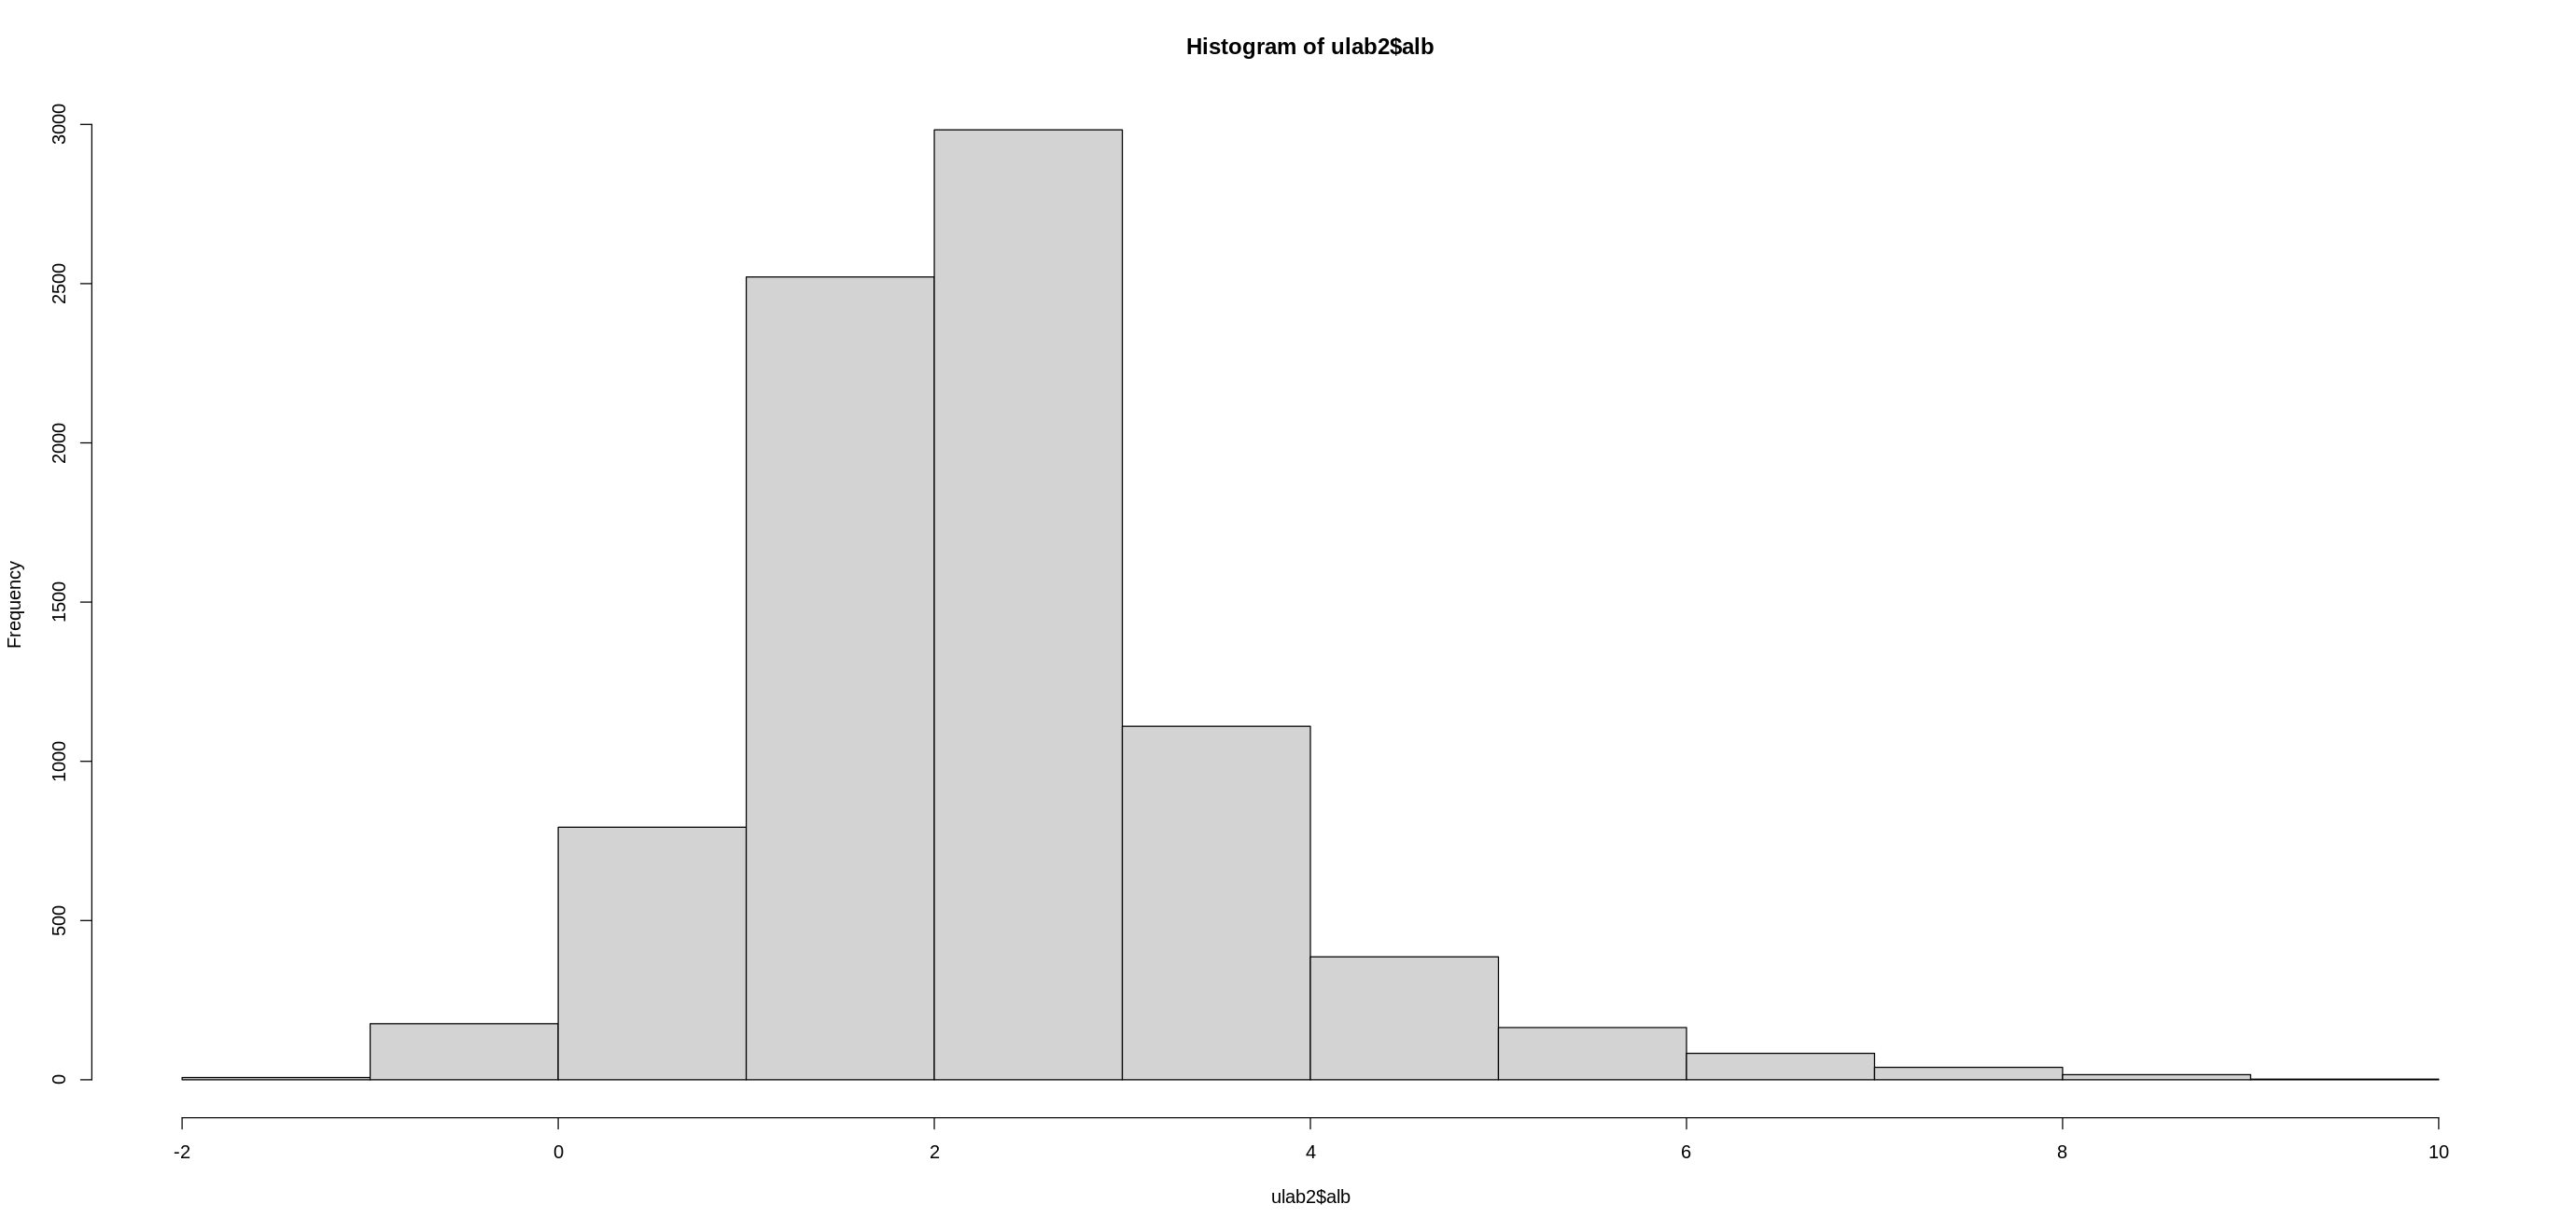

In [30]:
hist(ulab2$alb)

In [31]:
ad.test(ulab2$alb)


	Anderson-Darling normality test

data:  ulab2$alb
A = 93.995, p-value < 2.2e-16


Check outlier

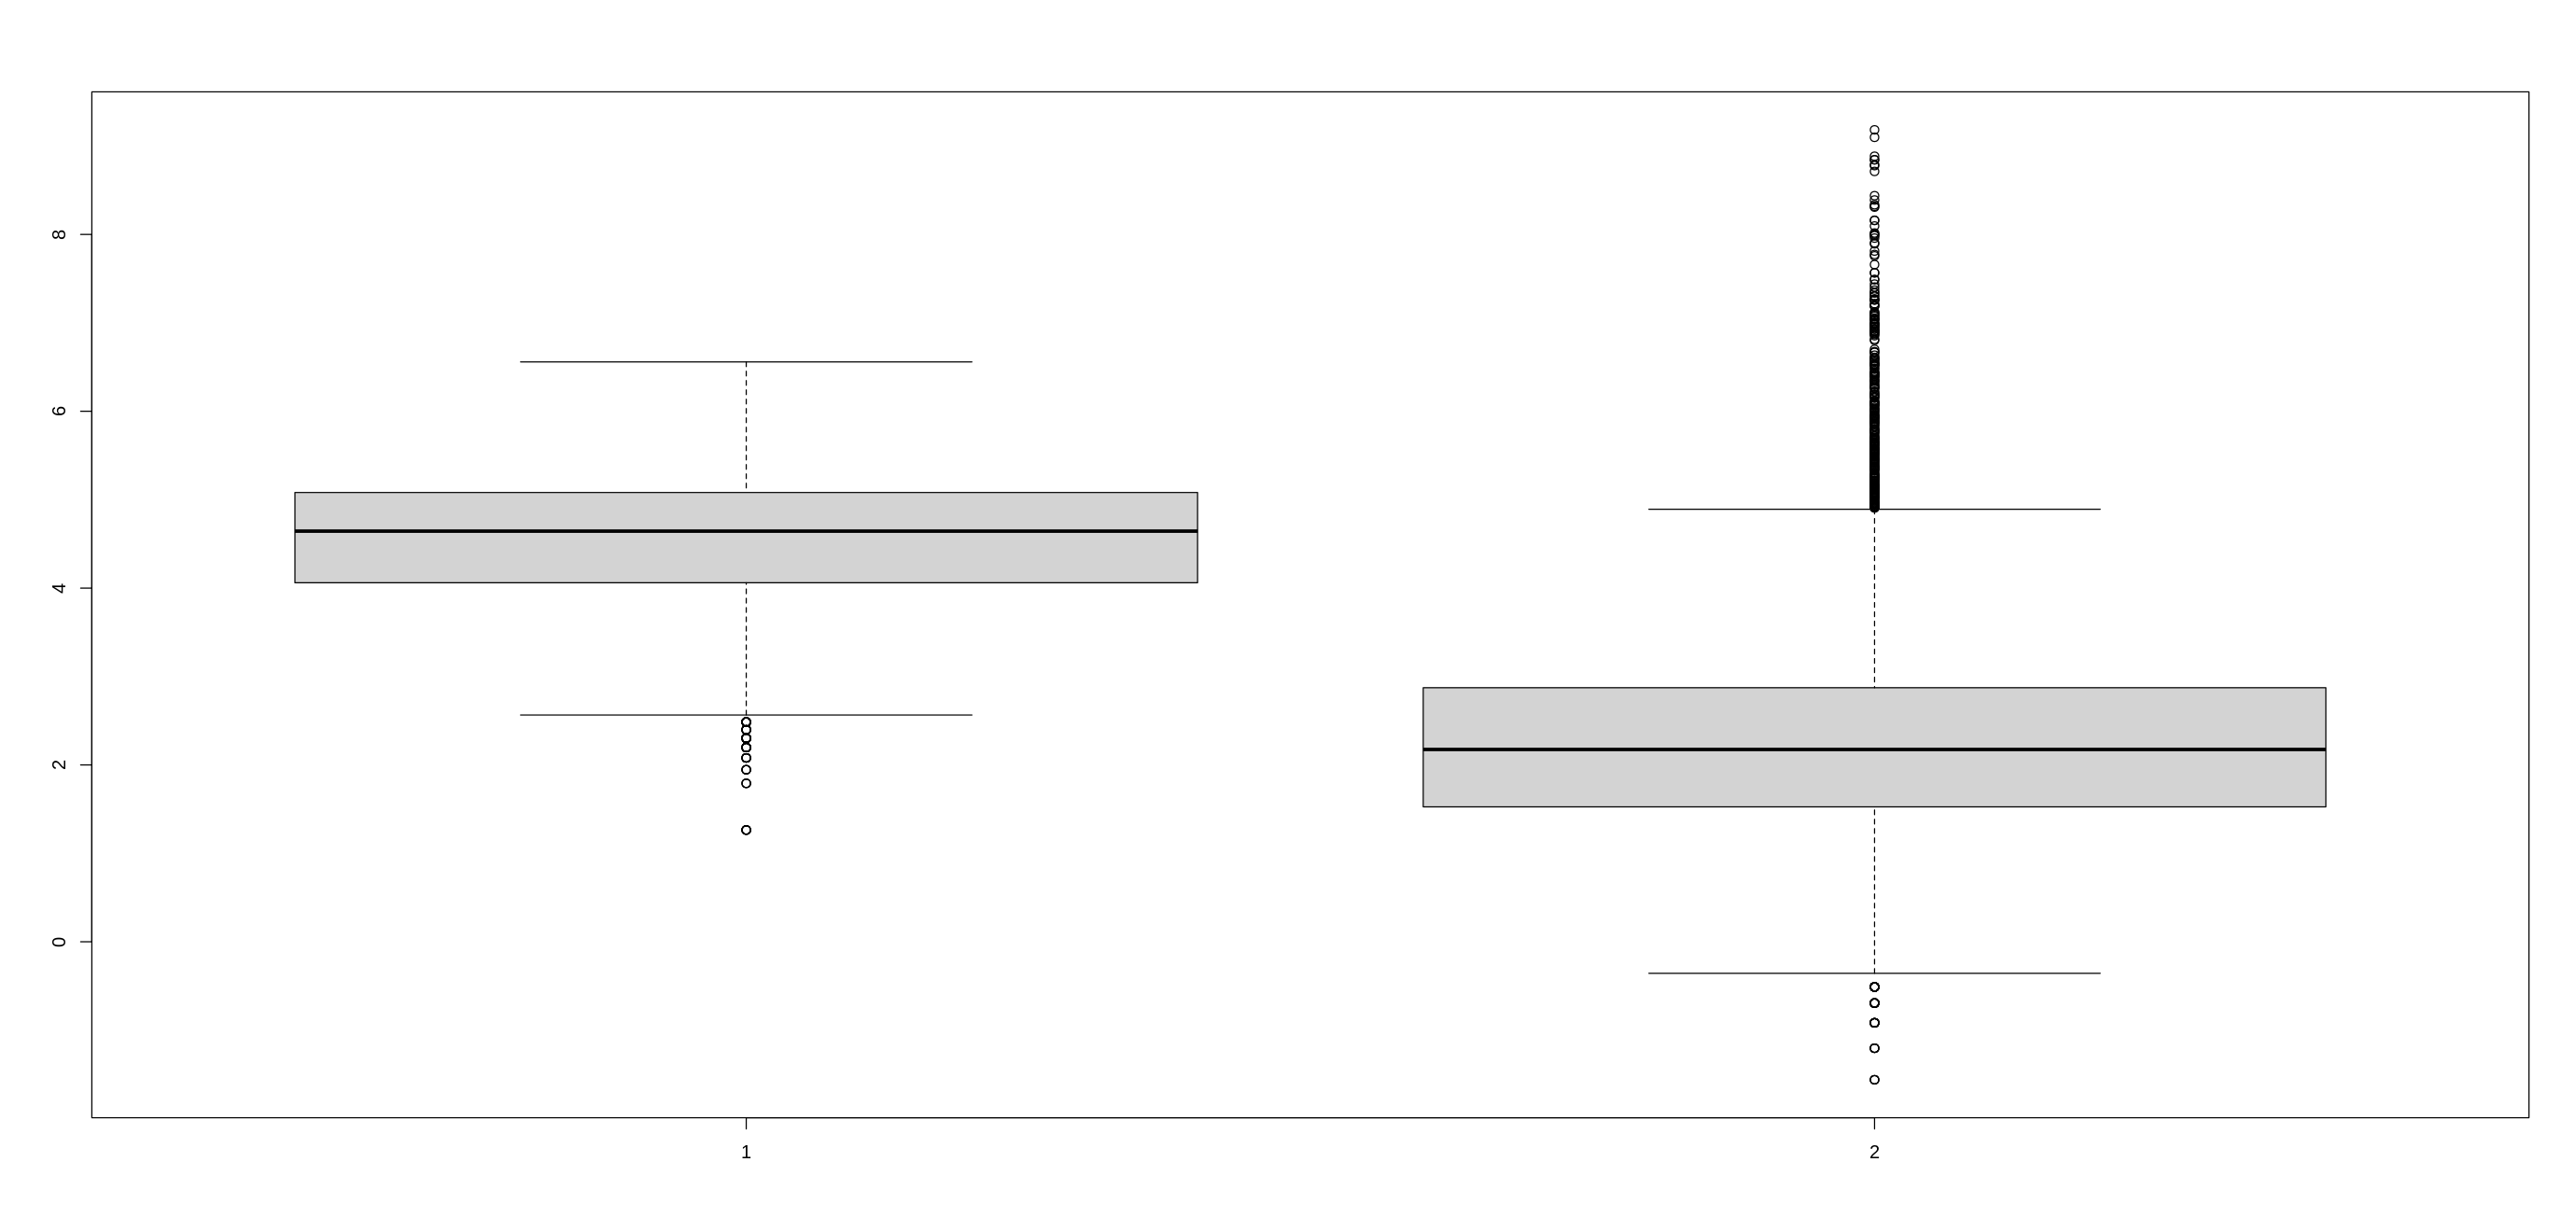

In [32]:
boxplot(ulab2$cr,ulab2$alb)

In [33]:
rosnerTest(ulab2$cr,k=10)

Warning message in rosnerTest(ulab2$cr, k = 10):
“328 observations with NA/NaN/Inf in 'x' removed.”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab2$cr

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 4.327034
                                 R.2  = 4.332197
                                 R.3  = 4.337379
                                 R.4  = 4.342580
                                 R.5  = 4.347799
                                 R.6  = 4.353037
                                 R.7  = 3.656511
                                 R.8  = 3.659691
                                 R.9  = 3.662879
                                 R.10 = 3.460584

Test Statistic Parameter:        k = 10

Alternative Hypothesis:          Up to 10 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:    

In [34]:
rosnerTest(ulab2$alb,k=30)

Warning message in rosnerTest(ulab2$alb, k = 30):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab2$alb, k = 30):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab2$alb

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8280

Test Statistics:                 R.1  = 5.413737
                                 R.2  = 5.356967
                                 R.3  = 5.197990
                                 R.4  = 5.175550
                                 R.5  = 5.183119
                                 R.6  = 5.148367
                                 R.7  = 5.148427
                                 R.8  = 5.105111
                                 R.9  = 4.894766
                                 R.10 = 4.863254
                                 R.11 = 4.827639
                                 R.12 = 4.821211
                                 R.13 = 4.820444
                                 R.14 = 4.708507
                                 R.15 =

**Remove the outliers**

In [39]:
outl<-rosnerTest(ulab2$alb,k=30)$all.stats

Warning message in rosnerTest(ulab2$alb, k = 30):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab2$alb, k = 30):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”


In [42]:
outl<-outl[outl$Outlier==TRUE,]

In [45]:
ulab2_c<-ulab2[-outl$Obs.Num,]

In [46]:
rosnerTest(ulab2_c$alb,k=30)

Warning message in rosnerTest(ulab2_c$alb, k = 30):
“328 observations with NA/NaN/Inf in 'x' removed.”
Warning message in rosnerTest(ulab2_c$alb, k = 30):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”



Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            ulab2_c$alb

Number NA/NaN/Inf's Removed:     328

Sample Size:                     8257

Test Statistics:                 R.1  = 4.489648
                                 R.2  = 4.463875
                                 R.3  = 4.457120
                                 R.4  = 4.382328
                                 R.5  = 4.311968
                                 R.6  = 4.316250
                                 R.7  = 4.259846
                                 R.8  = 4.263883
                                 R.9  = 4.227514
                                 R.10 = 4.204896
                                 R.11 = 4.181224
                                 R.12 = 4.162834
                                 R.13 = 4.163197
                                 R.14 = 4.142806
                                 R.15

**Recheck all steps again !!!**

Warning message:
“Removed 328 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 328 rows containing missing values (`geom_point()`).”


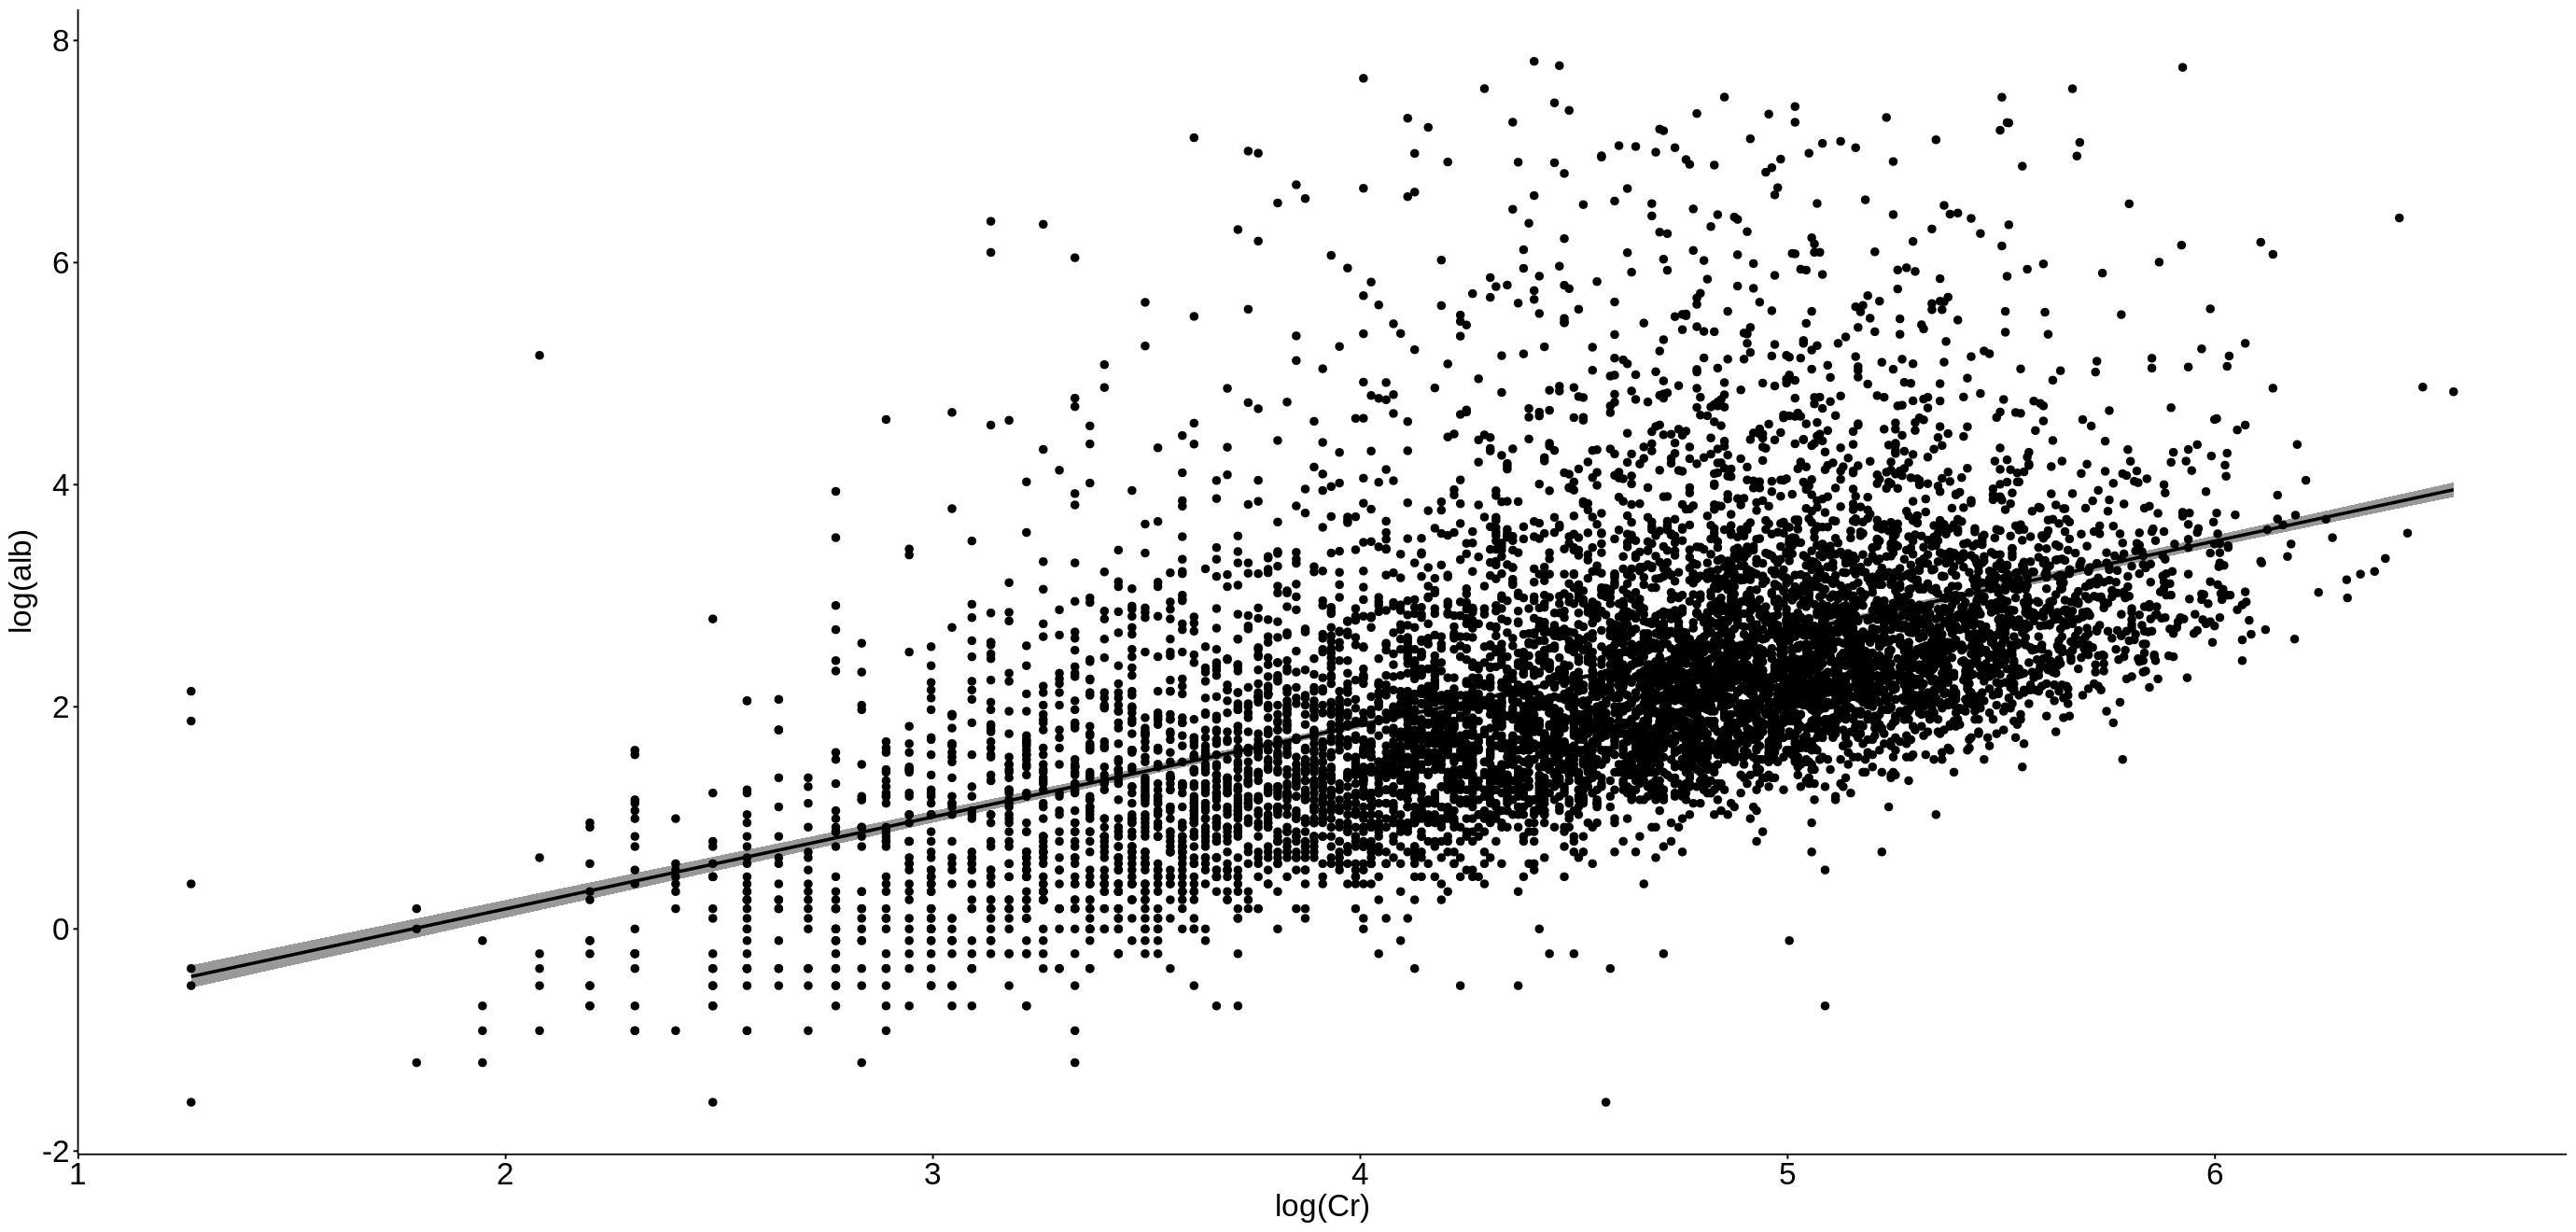

In [48]:
ggscatter(ulab2_c, x = "cr", y = "alb",
          add = "reg.line", conf.int = TRUE,
          xlab = "log(Cr)", ylab = "log(alb)")+
            theme(text = element_text(size = 20))

In [49]:
ad.test(ulab2_c$cr)


	Anderson-Darling normality test

data:  ulab2_c$cr
A = 48.32, p-value < 2.2e-16


In [50]:
ad.test(ulab2_c$alb)


	Anderson-Darling normality test

data:  ulab2_c$alb
A = 75.514, p-value < 2.2e-16


So, the best choice would be Spearman correlation test.

In [52]:
cor.test(ulab2_c$cr,ulab2_c$alb,method = c("spearman"))

Warning message in cor.test.default(ulab2_c$cr, ulab2_c$alb, method = c("spearman")):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  ulab2_c$cr and ulab2_c$alb
S = 4.0875e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5643417 


**Interpretation**

Higher **log of** levels of urine creatinine are related with **log of** higher levels of urine albumin (correlation coefficient > 0, direct relationship), and this relationship is unlikely to be due to random chance (P < 0.05).